### This experiment tests if changing the original Transformer architecture by reducing the width-factor after embedding can improve the performance

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import json

### check if the bleu scores match the later checked results

In [2]:
for lr in [0.0625, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 1.0]:

    ckpt_path = f'../../checkpoint/NMT_epochs/Simpson/WMT14_sample320000_depth6_width1024_lr{lr}_dropout0.1'

    with open(os.path.join(ckpt_path, 'bleu_loss.jsonl'), 'rb') as file:
        bleu = []
        epoch = 1
        for line in file:
            d = json.loads(line)
            bleu.append(d[f'epoch{epoch}_id_bleu_score'])
            epoch += 1
    print(np.mean(bleu[-5:]))

0.14248515318260346
0.1630097110160135
0.16672453202770293
0.1626045792445528
0.16021990647911735
0.16101637953788103
0.15551392962373847
0.12218511738428961


In [3]:
[0.1438518134079783, 0.1632421363580592, 0.16606541373929712, 0.16300429577451642, 0.16096566156804018, 0.16073086637023823, 0.15473496274319964, 0.12432076021536409]

[0.1438518134079783,
 0.1632421363580592,
 0.16606541373929712,
 0.16300429577451642,
 0.16096566156804018,
 0.16073086637023823,
 0.15473496274319964,
 0.12432076021536409]

### check the bleu score by looking at the log files

In [5]:
#all_loss = []
#all_loss_no_adjustment = []

#all_bleu = []
all_bleu_no_adjustment = []

for lr in [0.0625, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 1.0]:

    #ckpt_path = f'../checkpoint/NMT_epochs/Simpson/WMT14_sample320000_depth6_width1024_lr{lr}_dropout0.1_no_embedding_factor'
    ckpt_path = f'../../checkpoint/NMT_epochs/Simpson/WMT14_sample320000_depth6_width1024_lr{lr}_dropout0.1'

    loss = []
    bleu = []
    with open(os.path.join(ckpt_path, 'log_0.txt')) as f:
        lines = f.readlines()
        for line in lines:
            x = line.split(" ")
            #if 'Validation' in x and 'loss' in x and 'at' in x:
            #    loss.append(float(x[-1]))
            if 'BLEU' in x and 'score' in x and 'at' in x:
                bleu.append(float(x[-1]))
    all_bleu_no_adjustment.append(np.mean(bleu[-5:]))
            

In [7]:
print(all_bleu_no_adjustment)
#print(all_bleu)

[0.1438518134079783, 0.1632421363580592, 0.16606541373929712, 0.16300429577451642, 0.16096566156804018, 0.16073086637023823, 0.15473496274319964, 0.12432076021536409]


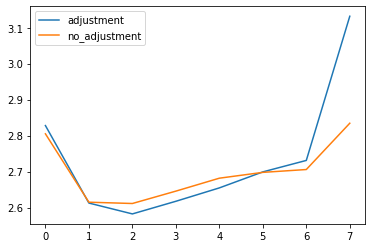

In [32]:
plt.figure()
plt.plot(all_loss, label = 'adjustment')
plt.plot(all_loss_no_adjustment, label = 'no_adjustment')
plt.legend()

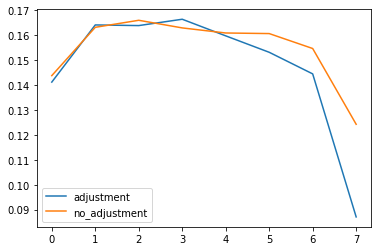

In [40]:
plt.figure()
plt.plot(all_bleu, label = 'adjustment')
plt.plot(all_bleu_no_adjustment, label = 'no_adjustment')
plt.legend()

# Compare models trained with a large width and models trained with base width

In [14]:
import os
import json
import matplotlib.pyplot as plt
import pickle

In [15]:
bleu_scores_large = []
lambda_vals_large = []

# Get the BLEU scores
for lr in ["0.25", "0.375", "0.5", "0.75", "1.0", "1.5"]:
    root = "/work/yyaoqing/Good_vs_bad_data/checkpoint/NMT_epochs/Simpson/"
    ckpt_folder = os.path.join(root, f'WMT14_sample320000_depth6_width1024_lr{lr}_dropout0.1')
    bleu_file = os.path.join(ckpt_folder, 'bleu_loss.jsonl')
    
    EPOCH=1
    with open(bleu_file, "rb") as file:
        for line in file:
            d = json.loads(line)
            if EPOCH==20:
                bleu_scores_large.append(d[f'epoch{EPOCH}_id_bleu_score'])
            EPOCH += 1
            
    ww_file = os.path.join(ckpt_folder, 'results.pkl')
    with open(ww_file, "rb") as file:
        d = pickle.load(file)
        lambda_vals_large.append(d[20]['details']['D'].mean())

In [17]:
bleu_scores_base = []
lambda_vals_base = []

# Get the BLEU scores
for lr in ["0.25", "0.375", "0.5", "0.75", "1.0", "1.5"]:
    root = "/work/yyaoqing/Good_vs_bad_data/checkpoint/NMT_epochs/Simpson/"
    ckpt_folder = os.path.join(root, f'WMT14_sample320000_depth6_width512_lr{lr}_dropout0.1')
    bleu_file = os.path.join(ckpt_folder, 'bleu_loss.jsonl')
    with open(bleu_file, "rb") as file:
        epoch=1
        for line in file:
            d = json.loads(line)
            if epoch==20:
                bleu_scores_base.append(d['epoch20_id_bleu_score'])
            epoch += 1
    
    ww_file = os.path.join(ckpt_folder, 'results.pkl')
    with open(ww_file, "rb") as file:
        d = pickle.load(file)
        lambda_vals_base.append(d[20]['details']['D'].mean())

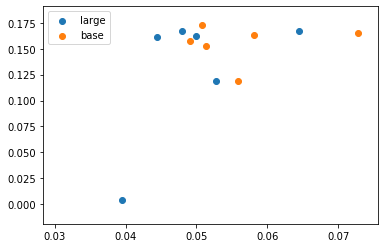

In [18]:
plt.figure()
plt.scatter(lambda_vals_large, bleu_scores_large, label = 'large')
plt.scatter(lambda_vals_base, bleu_scores_base, label = 'base')
plt.legend()